#project Name: Heart Disease Prediction
##Group Members
###1.Rohan Wagh (202201040090)
###2.Rohan Agarwal(202201040208)

#Dataset Link:
###https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv(r'/content/drive/My Drive/AIML_MDM/heart_dataset.csv')
print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

#Display the first few rows of dataset (by default it is 5)

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# how many null (missing) values are present in each column

In [7]:
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#remove rows with missing (null) values

In [8]:
dataset = dataset.dropna()
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Fill missing values for 'trestbps' with the mean value

In [9]:

dataset['trestbps'] = dataset['trestbps'].fillna(dataset['trestbps'].mean())


#checking for invalid values in column sex and restecg

In [10]:
invalid_sex = dataset.loc[(dataset['sex'] != 0) & (dataset['sex'] != 1)]
invalid_restecg = dataset.loc[(dataset['restecg'] != 0) & (dataset['restecg'] != 1)]



In [11]:
dataset.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


#as there is only categorical format no need of converting  Categorical Variables to Numerical Formats

#

#Descriptive statistics

In [12]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#
Exploratory Data Analysis(EDA)

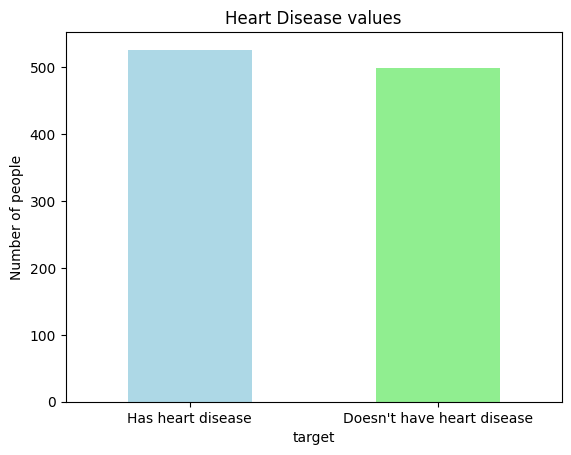

In [13]:
fig = dataset.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Number of people");

#Sex Distribution of Heart Disease Patients

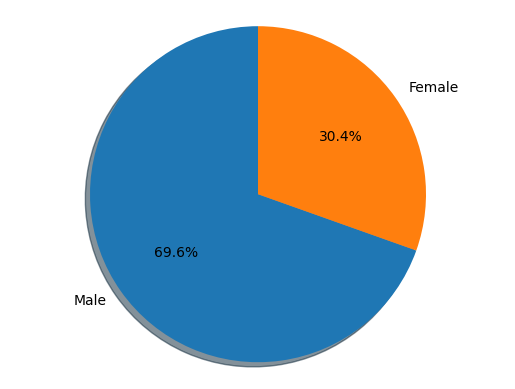

In [14]:
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(dataset.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

#Heart Disease Frequency by Sex

<ipython-input-15-e3974e1a51df>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)


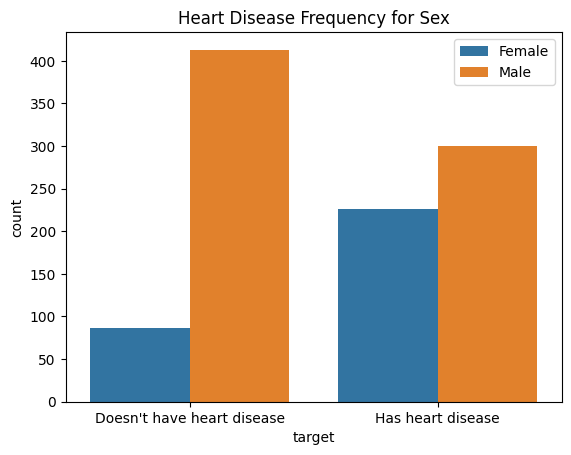

In [15]:
fig = sns.countplot(x = 'target', data= dataset, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

#Chest Pain Types and Their Frequencies in Heart Disease Patients

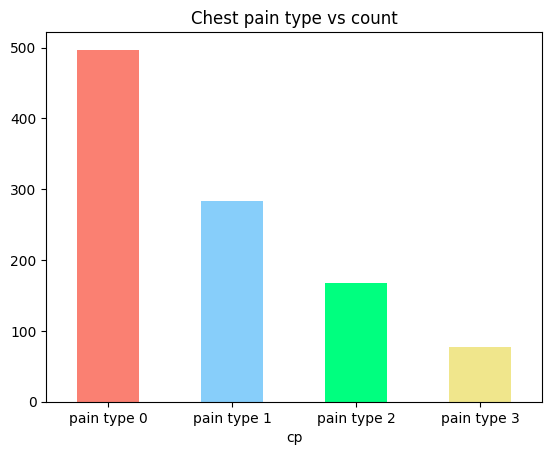

In [16]:
fig = dataset.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

#Distribution of Chest Pain Types by Heart Disease Status

<ipython-input-17-699ee9208a1e>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)


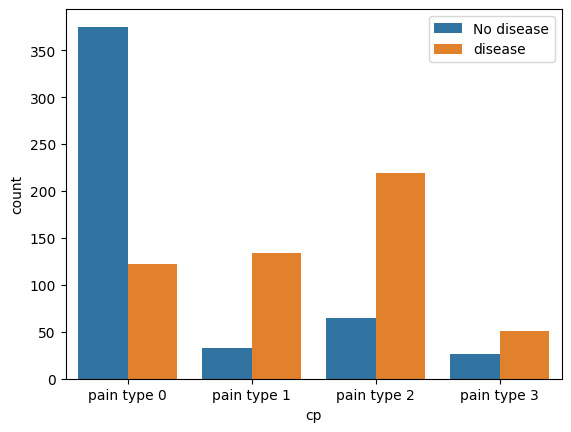

In [17]:
fig = sns.countplot(x = 'cp', data = dataset, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

#Scatter Plot of Age vs. Maximum Heart Rate in Heart Disease Patients

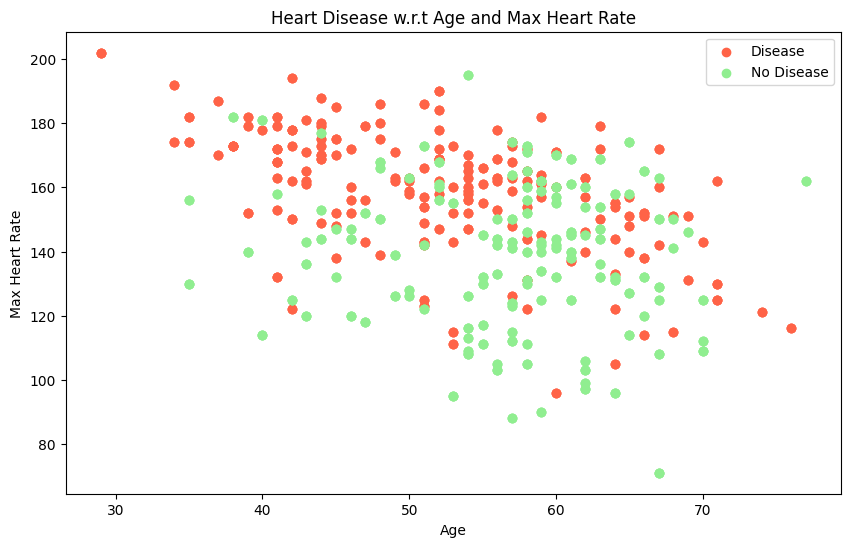

In [18]:
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1],
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c="lightgreen")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

#Scatter Plot of Age vs. Serum Cholesterol Levels in Heart Disease Patients

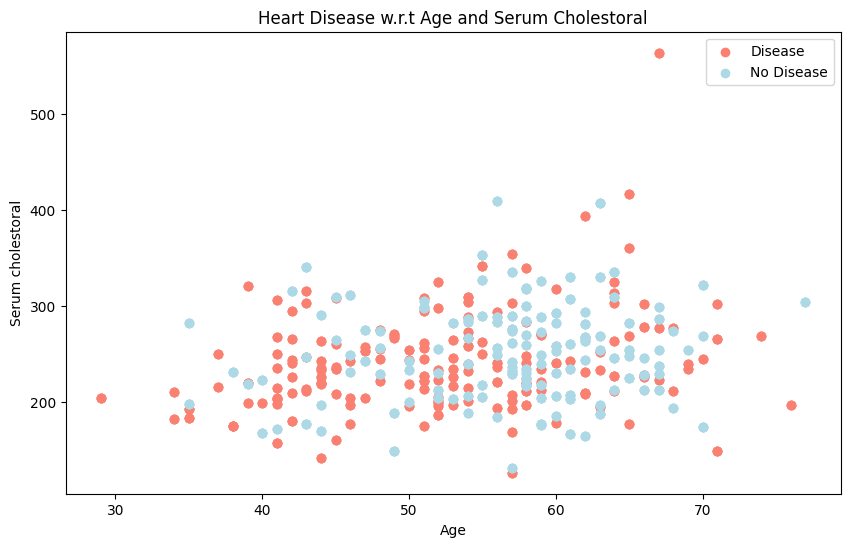

In [19]:
df=dataset
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1],
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0],
            df.chol[df.target==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

#Correlation Heatmap of Heart Disease Features

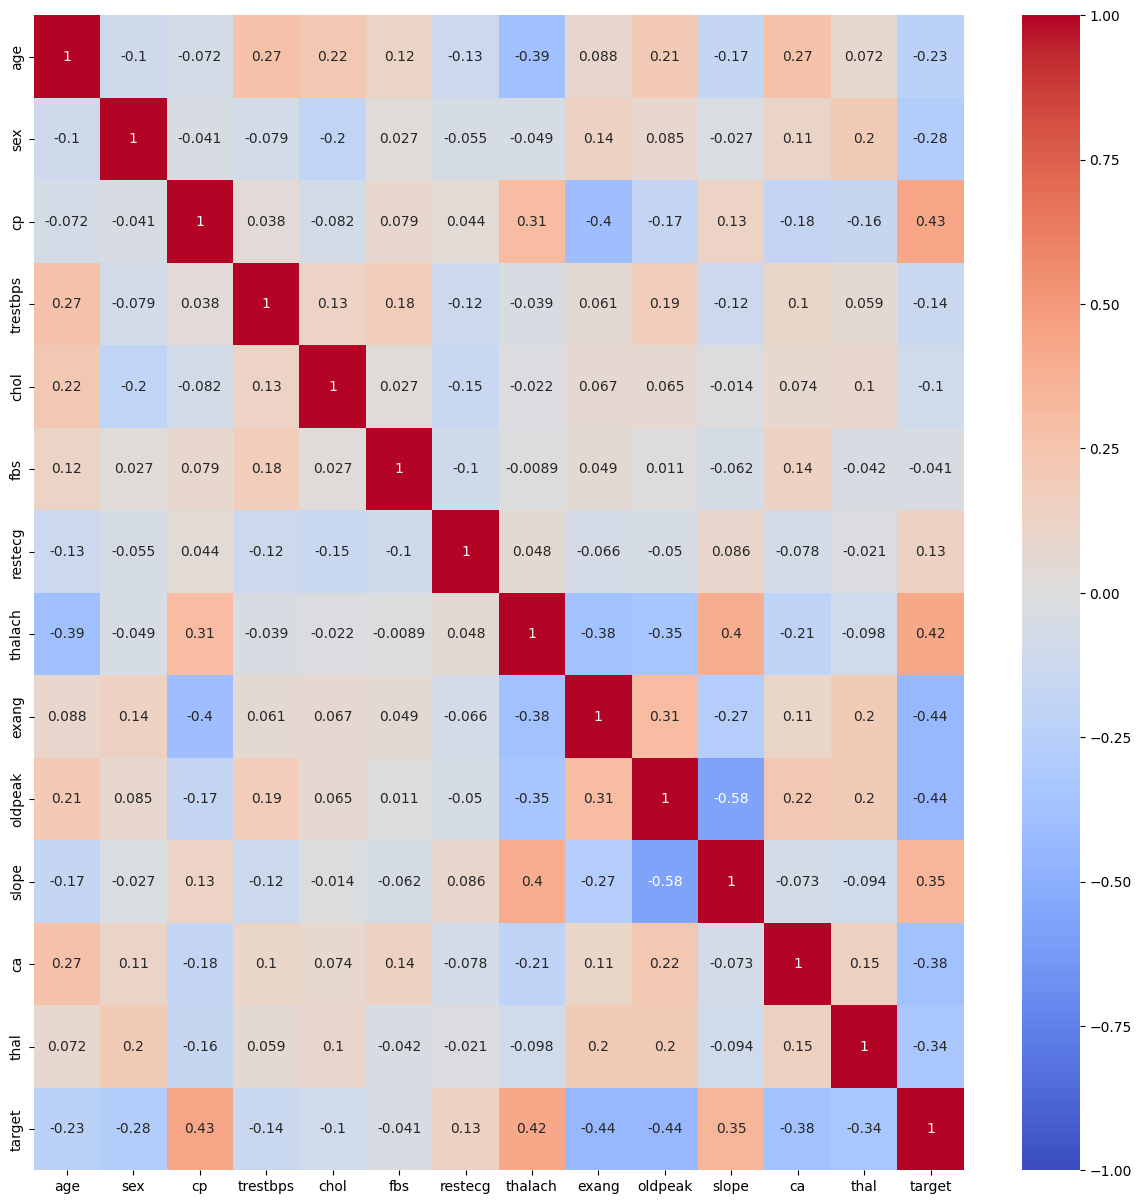

In [20]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

#Distribution of Continuous Variables

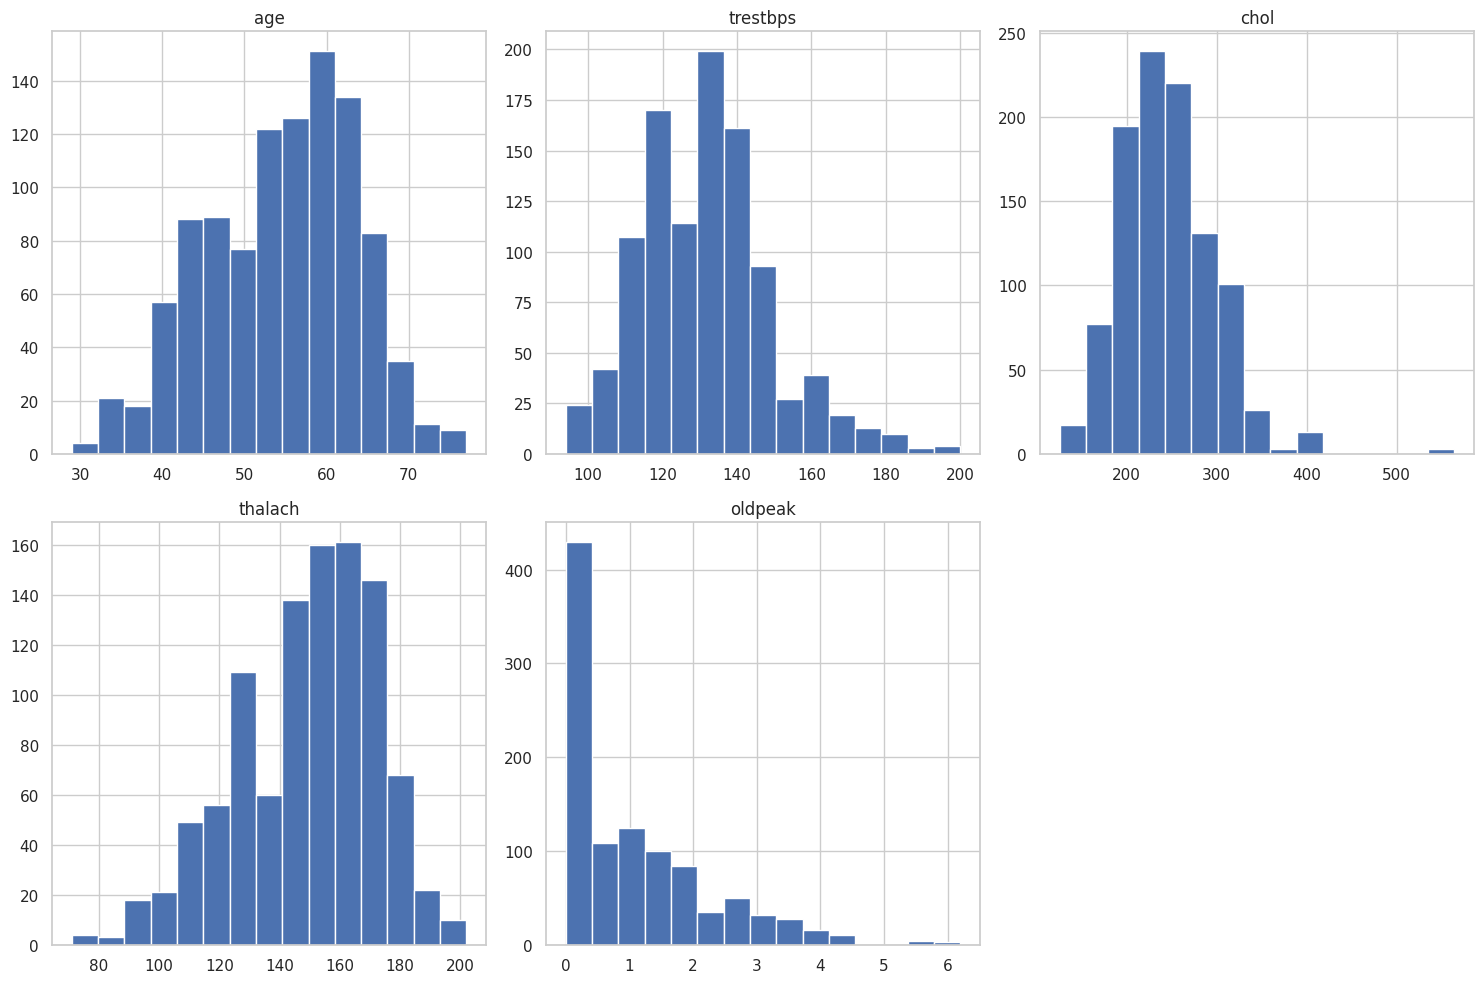

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Histograms for continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[continuous_vars].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()


In [22]:
data=dataset

In [23]:
y = data["target"]
X = data.drop('target',axis=1)

In [24]:
from sklearn.preprocessing import minmax_scale


In [25]:
cols=X.columns
for col in cols:
   X[col]=minmax_scale(X[col])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)

In [27]:
from collections import Counter
Counter(y_train)

Counter({1: 344, 0: 322})

//Naive Bias

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[139  38]
 [ 25 157]]


Accuracy of Naive Bayes model: 82.45125348189416 

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       177
           1       0.81      0.86      0.83       182

    accuracy                           0.82       359
   macro avg       0.83      0.82      0.82       359
weighted avg       0.83      0.82      0.82       359



//KNN

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[158  19]
 [ 28 154]]


Accuracy of K-NeighborsClassifier: 86.90807799442896 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       177
           1       0.89      0.85      0.87       182

    accuracy                           0.87       359
   macro avg       0.87      0.87      0.87       359
weighted avg       0.87      0.87      0.87       359



//Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[156  21]
 [ 16 166]]


Accuracy of DecisionTreeClassifier: 89.69359331476323 

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       177
           1       0.89      0.91      0.90       182

    accuracy                           0.90       359
   macro avg       0.90      0.90      0.90       359
weighted avg       0.90      0.90      0.90       359



//svm

In [31]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =10)
m7 = 'Support Vector Classifier'
svc =  SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[154  23]
 [ 23 159]]


Accuracy of Support Vector Classifier: 87.1866295264624 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       177
           1       0.87      0.87      0.87       182

    accuracy                           0.87       359
   macro avg       0.87      0.87      0.87       359
weighted avg       0.87      0.87      0.87       359



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import joblib

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

# Training the Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)

# Making predictions
svc_predicted = svc.predict(X_test)

# Evaluation
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

print("Confusion Matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')
print(classification_report(y_test, svc_predicted))

# Saving the model
model_filename = 'fea.joblib'
joblib.dump(svc, model_filename)
print(f"Model saved as {model_filename}")


Confusion Matrix
[[154  23]
 [ 23 159]]


Accuracy of Support Vector Classifier: 87.1866295264624 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       177
           1       0.87      0.87      0.87       182

    accuracy                           0.87       359
   macro avg       0.87      0.87      0.87       359
weighted avg       0.87      0.87      0.87       359

Model saved as svc_model.joblib


In [33]:
import joblib

# Loading the model
model_filename = 'svc_model.joblib'
loaded_svc = joblib.load(model_filename)

# Using the loaded model for predictions
new_predictions = loaded_svc.predict(X_test)
print(new_predictions)


[0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0
 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1]


resets the index of dataset